In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# read out_LED.csv as dataframe
og_df = pd.read_csv('../out_LED.csv')

# chose non repeat trials - 0 or 2 or missing
df = og_df[ og_df['repeat_trial'].isin([0,2]) | og_df['repeat_trial'].isna() ]

# only session type 7
session_type = 7    
df = df[ df['session_type'].isin([session_type]) ]

# training level 16
training_level = 16
df = df[ df['training_level'].isin([training_level]) ]

# find ABL and ILD
ABL_arr = df['ABL'].unique()
ILD_arr = df['ILD'].unique()


# sort ILD arr in ascending order
ILD_arr = np.sort(ILD_arr)
ABL_arr = np.sort(ABL_arr)

print('ABL:', ABL_arr)
print('ILD:', ILD_arr)




ABL: [20 40 60]
ILD: [-16.  -8.  -4.  -2.  -1.   1.   2.   4.   8.  16.]


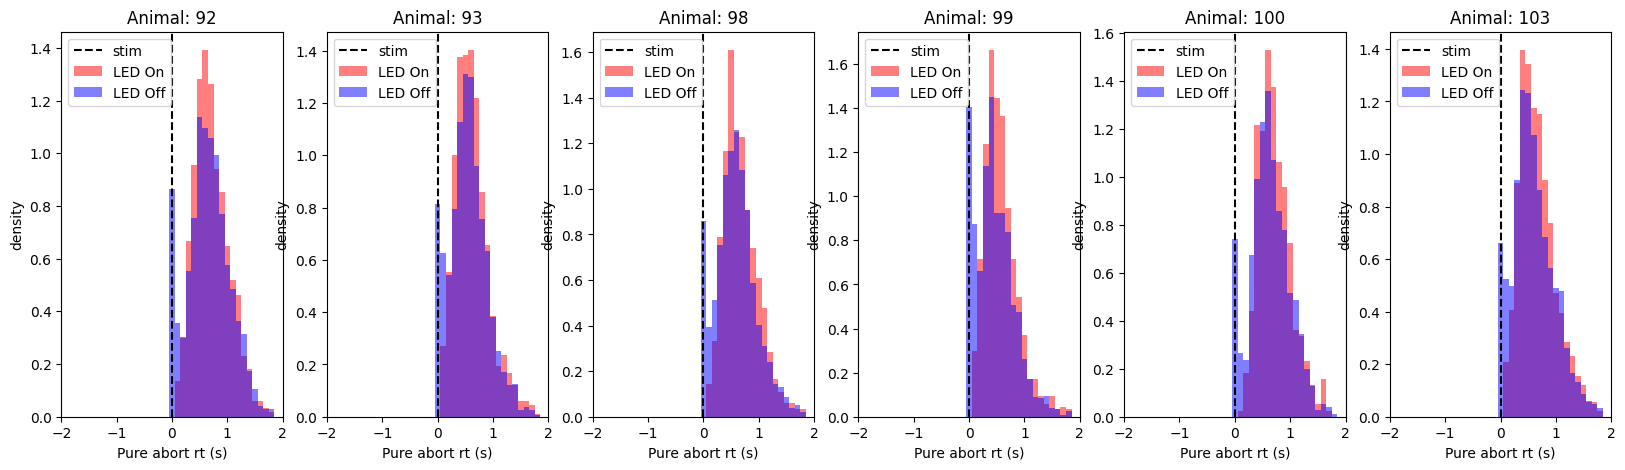

In [23]:
animals = df['animal'].unique()
f = 1
plt.figure(figsize=(20, 5))
for animal in animals:
    df_1 = df[ df['animal'] == animal ]
    
    LED_on_aborts = []
    LED_off_aborts = []

    for idx, row in df_1.iterrows():
        if row['timed_fix'] < row['intended_fix']: # if abort
            if row['LED_trial'] == 1 and row['timed_fix'] > row['LED_onset_time']:
                LED_on_aborts.append(row['timed_fix'])
            elif row['LED_trial'] == 0: 
                LED_off_aborts.append(row['timed_fix'])

    bin_width = 0.1
    bins = np.arange(-2, 2, bin_width)

    led_on_hist, _ = np.histogram(LED_on_aborts, bins=bins, density=True)
    led_off_hist, _ = np.histogram(LED_off_aborts, bins=bins, density=True)

    plt.subplot(1, len(animals), f)
    plt.bar(bins[:-1], led_on_hist, width=bin_width, alpha=0.5, label='LED On', color='r')
    plt.bar(bins[:-1], led_off_hist, width=bin_width, alpha=0.5, label='LED Off', color='b')
    plt.xlim(-2, 2);
    plt.axvline(x=0, color='k', linestyle='--', label='stim')
    plt.legend();

    plt.xlabel('Pure abort rt (s)');
    plt.ylabel('density');
    plt.title('Animal: ' + str(animal))
    f += 1


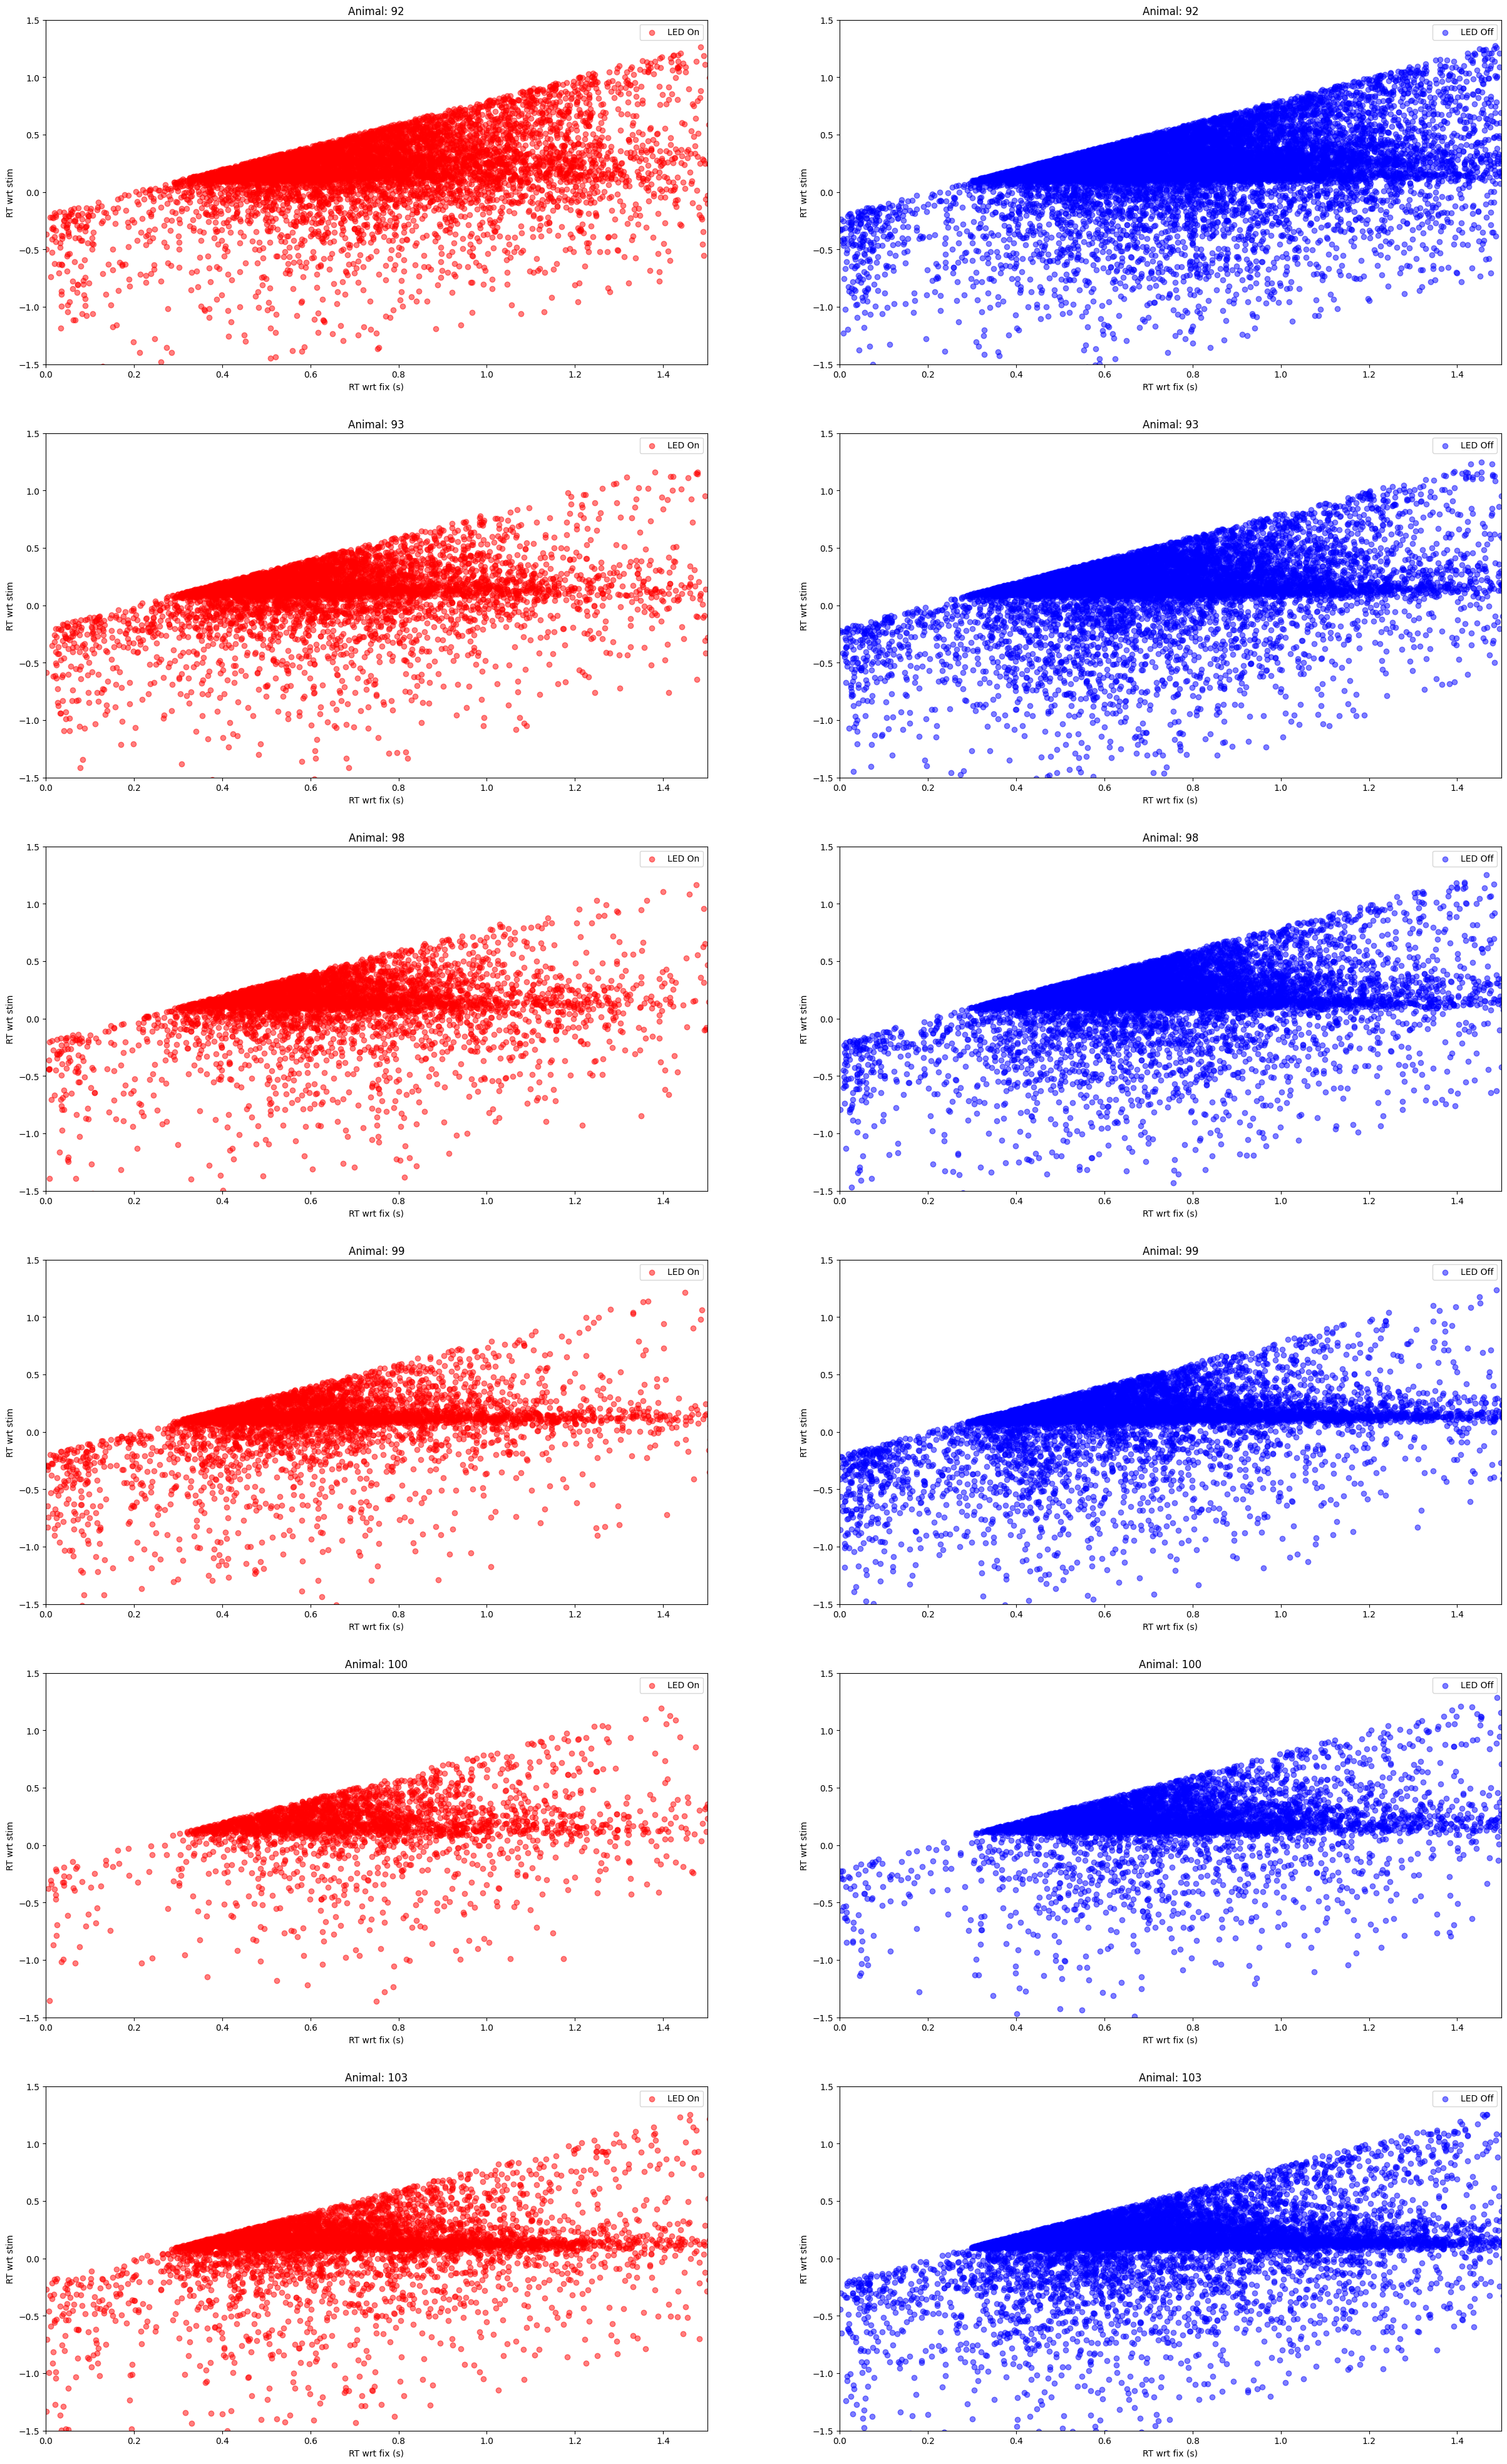

In [ ]:
animals = df['animal'].unique()
f = 1
plt.figure(figsize=(30, 50))
for animal in animals:
    df_1 = df[ df['animal'] == animal ]
    
    LED_on_wrt_sound = []
    LED_on_wrt_fix = []

    LED_off_wrt_sound = []
    LED_off_wrt_fix = []

    for idx, row in df_1.iterrows():
        if row['timed_fix'] < row['intended_fix']:
            if row['LED_trial'] == 1:
                LED_on_wrt_sound.append(row['timed_fix'] - row['intended_fix'])
                LED_on_wrt_fix.append(row['timed_fix'])
            elif row['LED_trial'] == 0:
                LED_off_wrt_sound.append(row['timed_fix'] - row['intended_fix'])
                LED_off_wrt_fix.append(row['timed_fix'])
        

    plt.subplot(len(animals),2, f)
    plt.scatter(LED_on_wrt_fix, LED_on_wrt_sound, color='r', alpha=0.5, label='LED On')
    plt.xlabel('RT wrt fix (s)');
    plt.ylabel('RT wrt stim');
    plt.title('Animal: ' + str(animal))
    plt.legend();
    plt.ylim(-1.5, 1.5)
    plt.xlim(0, 1.5)

    f += 1
    
    plt.subplot(len(animals),2, f)
    plt.scatter(LED_off_wrt_fix, LED_off_wrt_sound, color='b', alpha=0.5, label='LED Off')
    plt.xlabel('RT wrt fix (s)');
    plt.ylabel('RT wrt stim');
    plt.title('Animal: ' + str(animal))
    plt.legend();
    plt.ylim(-1.5, 1.5)
    plt.xlim(0, 1.5)

    f += 1

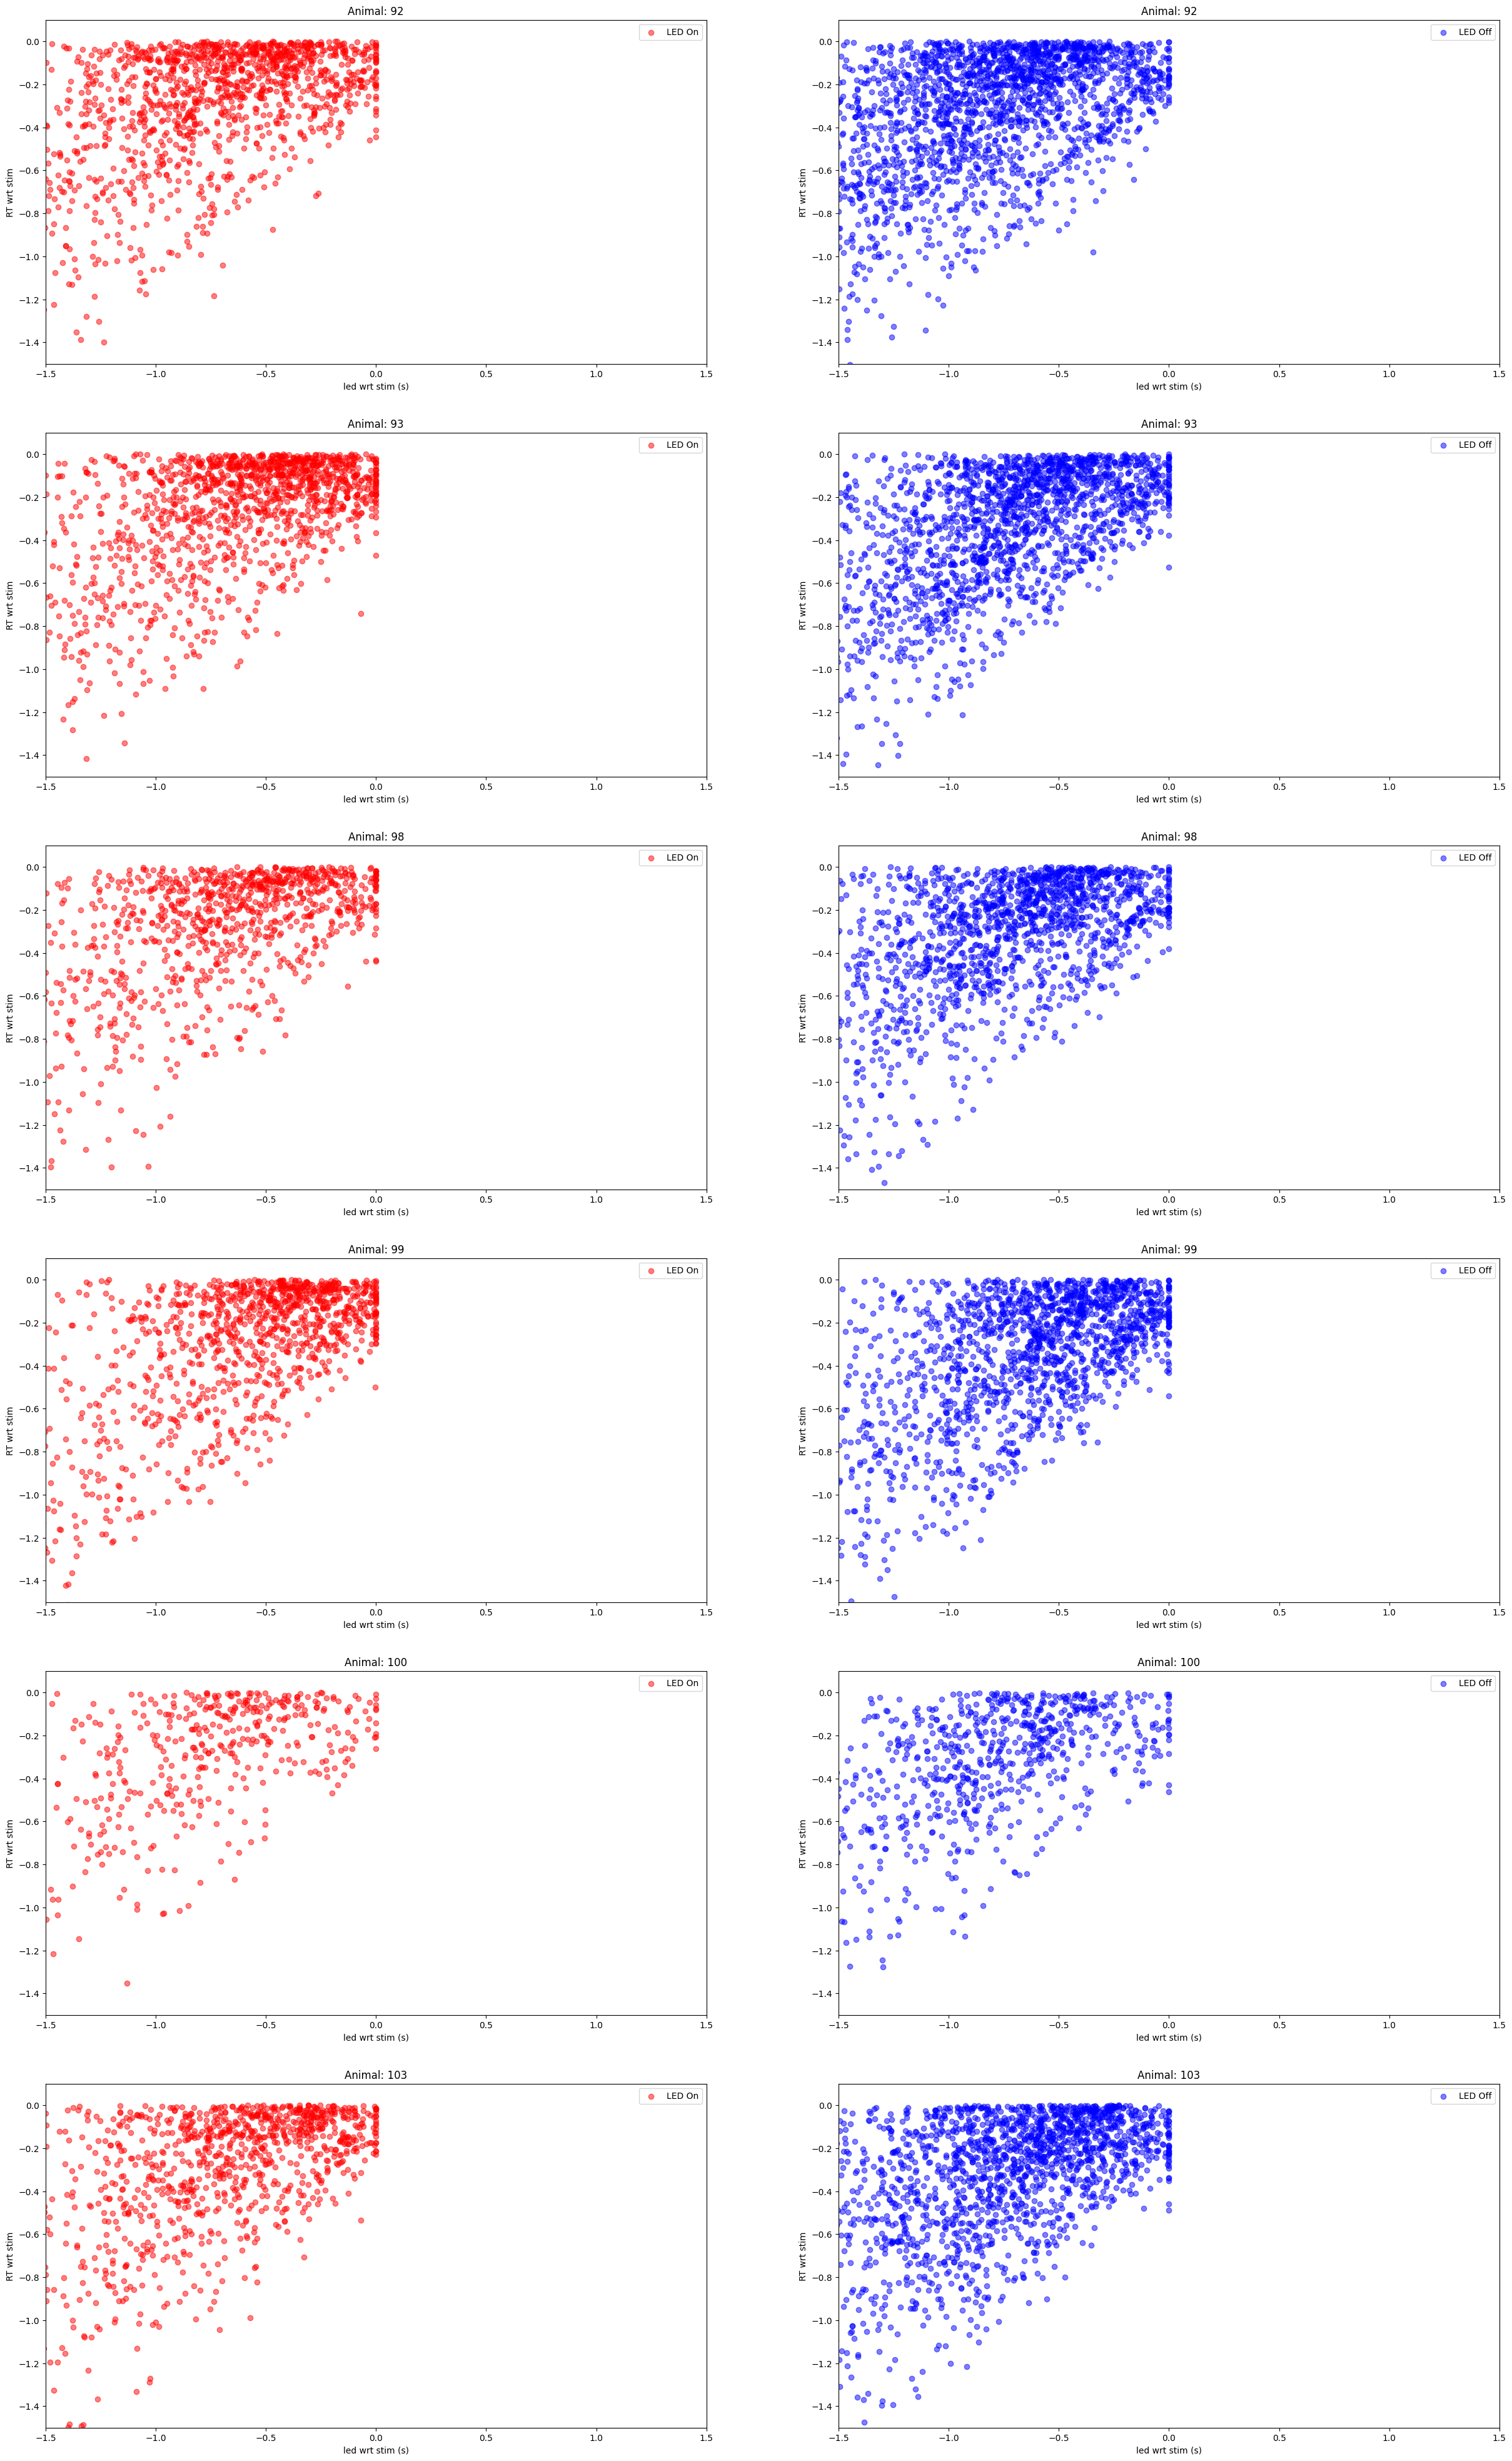

In [60]:
animals = df['animal'].unique()
f = 1
plt.figure(figsize=(30, 50))
for animal in animals:
    df_1 = df[ df['animal'] == animal ]
    
    LED_on_wrt_sound = []
    LED_on_wrt_led = []

    LED_off_wrt_sound = []
    LED_off_wrt_led = []

    for idx, row in df_1.iterrows():
        if row['timed_fix'] < row['intended_fix']:
            if row['LED_trial'] == 1:
                LED_on_wrt_sound.append(row['timed_fix'] - row['intended_fix'])
                LED_on_wrt_led.append(row['LED_onset_time'] - row['intended_fix'])
            elif row['LED_trial'] == 0:
                LED_off_wrt_sound.append(row['timed_fix'] - row['intended_fix'])
                LED_off_wrt_led.append(row['LED_onset_time'] - row['intended_fix'])
        

    plt.subplot(len(animals),2, f)
    plt.scatter(LED_on_wrt_led, LED_on_wrt_sound, color='r', alpha=0.5, label='LED On')
    plt.xlabel('led wrt stim (s)');
    plt.ylabel('RT wrt stim');
    plt.title('Animal: ' + str(animal))
    plt.legend();
    plt.ylim(-1.5, 0.1)
    plt.xlim(-1.5, 1.5)
    f += 1
    
    plt.subplot(len(animals),2, f)
    plt.scatter(LED_off_wrt_led, LED_off_wrt_sound, color='b', alpha=0.5, label='LED Off')
    plt.xlabel('led wrt stim (s)');
    plt.ylabel('RT wrt stim');
    plt.title('Animal: ' + str(animal))
    plt.legend();
    plt.ylim(-1.5, 0.1)
    plt.xlim(-1.5, 1.5)
    
    f += 1

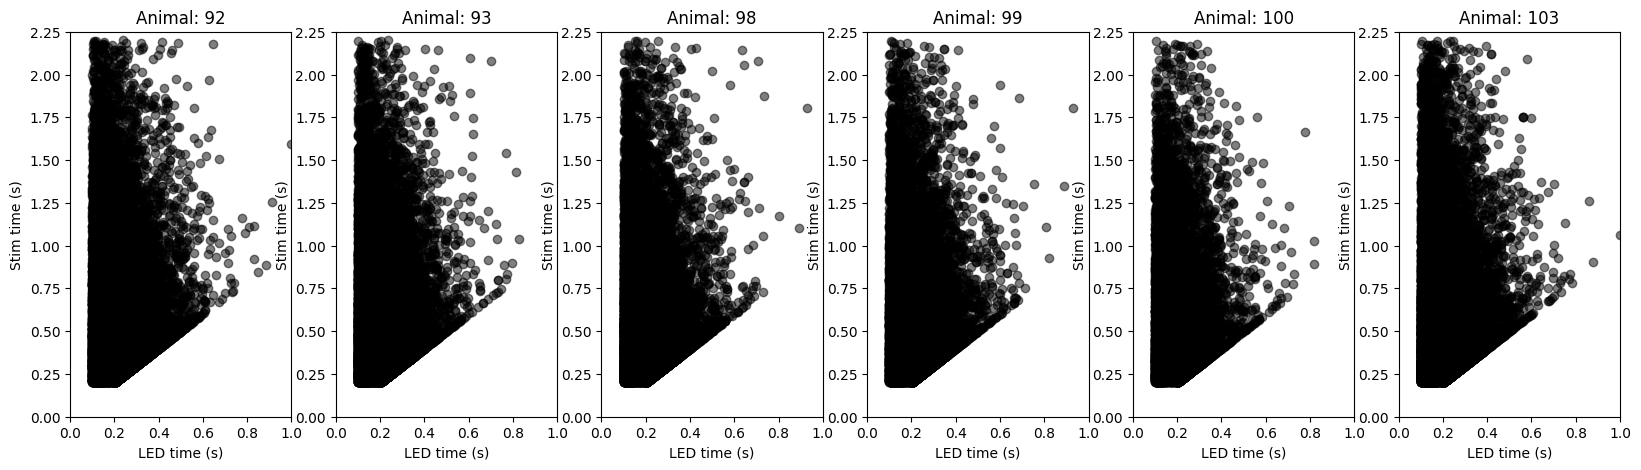

In [57]:
animals = df['animal'].unique()
f = 1
plt.figure(figsize=(20, 5))
for animal in animals:
    df_1 = df[ df['animal'] == animal ]
    
    led_time = []
    stim_time = []

    for idx, row in df_1.iterrows():
        led_time.append(row['LED_onset_time'])
        stim_time.append(row['intended_fix'])


    plt.subplot(1, len(animals), f)
    plt.plot(led_time, stim_time, 'o', color='k', alpha=0.5)
    plt.xlabel('LED time (s)');
    plt.ylabel('Stim time (s)');
    plt.title('Animal: ' + str(animal))
    plt.xlim(0, 1)
    plt.ylim(0, 2.25)
    f += 1

    

# for each animal - LED onset time distr for LED on and OFF trials

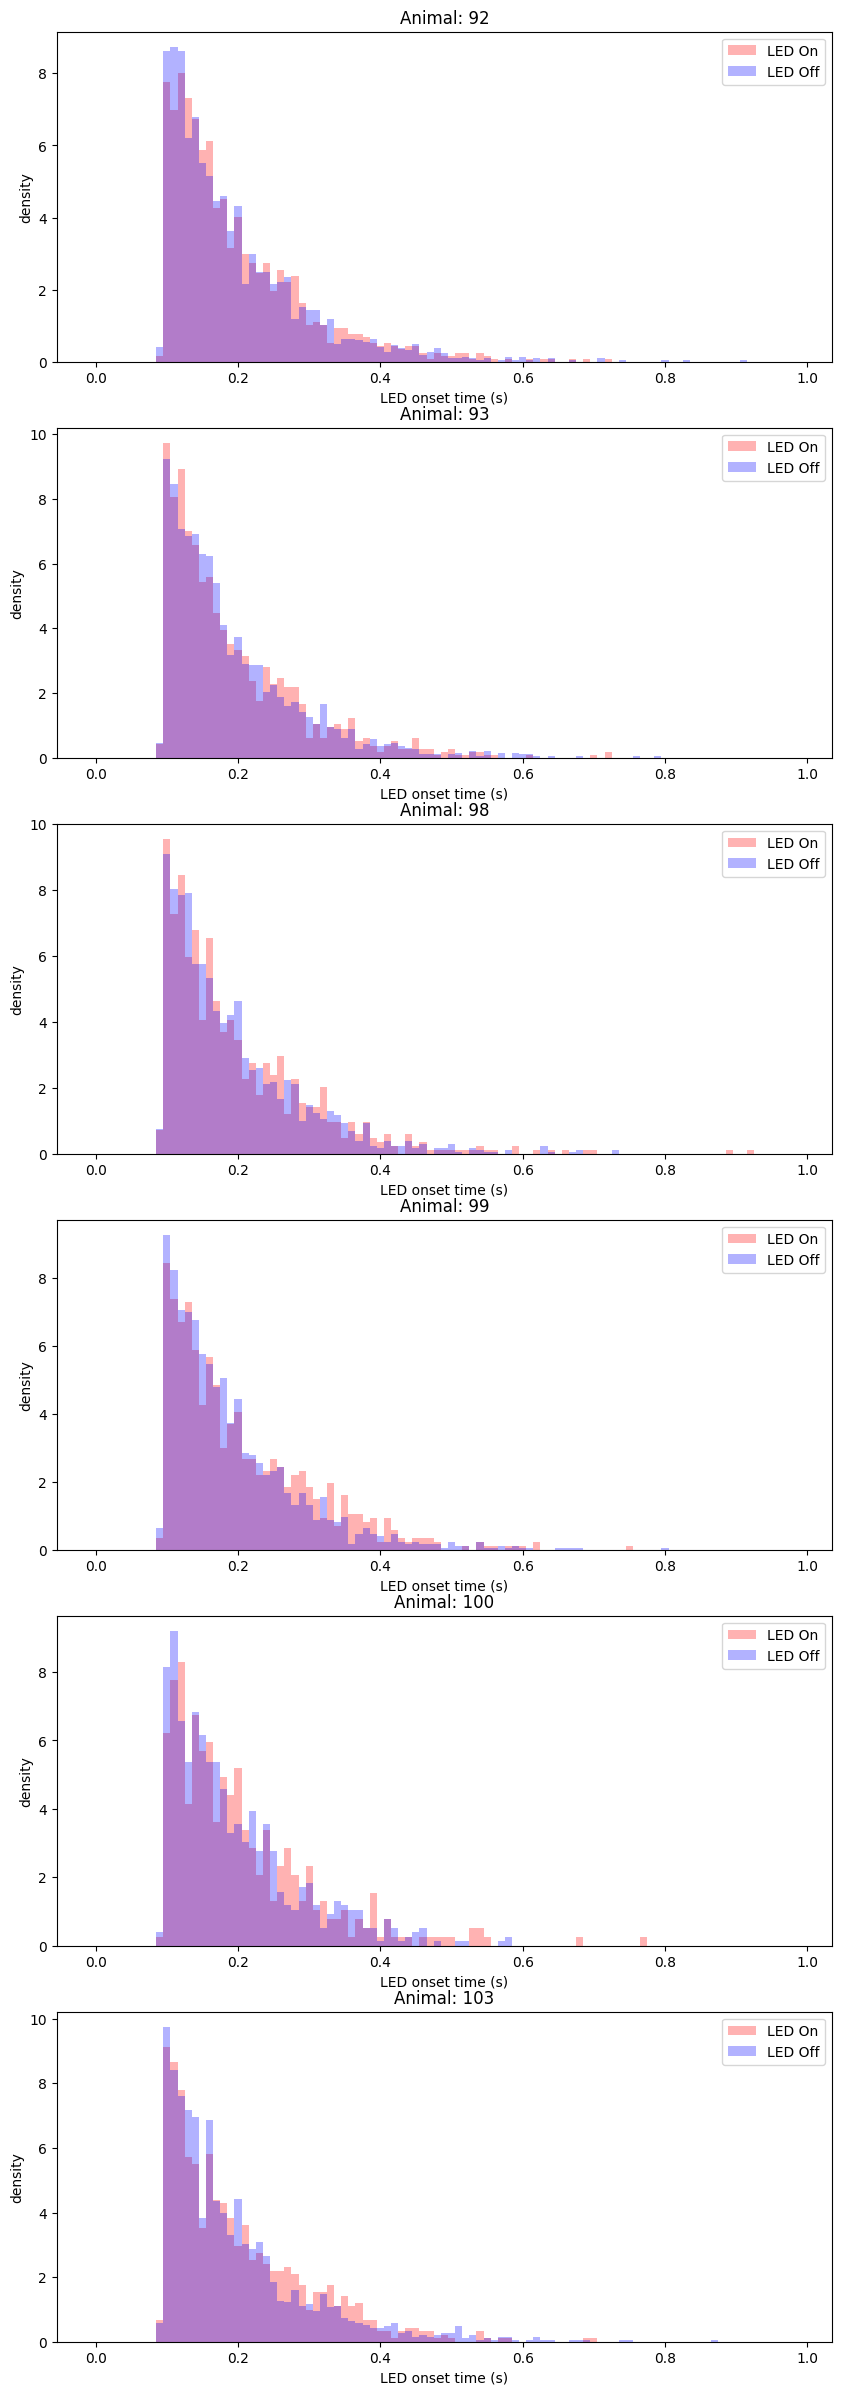

In [4]:
all_animals = df['animal'].unique()
f = 1

bin_width = 0.01
bins = np.arange(0, 1, bin_width)

plt.figure(figsize=(10, 30))
for animal in all_animals:
    df_animal = df[ df['animal'] == animal ]

    df_animal_led_1 = df_animal[ (df_animal['LED_trial'] == 1) & (df_animal['abort_event'] ==3) & (df_animal['timed_fix'] > df_animal['LED_onset_time'] ) ]
    df_animal_led_0 = df_animal[ (df_animal['LED_trial'] == 0) & (df_animal['abort_event'] ==3) ]

    led_1_onset_time = df_animal_led_1['LED_onset_time'].values
    led_0_onset_time = df_animal_led_0['LED_onset_time'].values

    plt.subplot(len(all_animals),1, f)
    
    led_1_hist, _ = np.histogram(led_1_onset_time, bins=bins, density=True)
    plt.bar(bins[:-1], led_1_hist, width=bin_width, alpha=0.3, label='LED On', color='r')

    led_0_hist, _ = np.histogram(led_0_onset_time, bins=bins, density=True)
    plt.bar(bins[:-1], led_0_hist, width=bin_width, alpha=0.3, label='LED Off', color='b')

    plt.xlabel('LED onset time (s)');

    plt.ylabel('density');
    plt.title('Animal: ' + str(animal))
    plt.legend();
    f += 1


# aborts in early and late LED onset for each animal

for low time, LED might not have much effect on push PA variable
but for high time, LED might push PA variable to cross threshold early

In [43]:
all_led_onset_time = df[ 'LED_onset_time'].values
percentiles = [30, 60, 90]
percentile_tuples = [(0, percentiles[0])] + [(percentiles[i], percentiles[i+1]) for i in range(len(percentiles)-1)] + [(percentiles[-1], 100)]

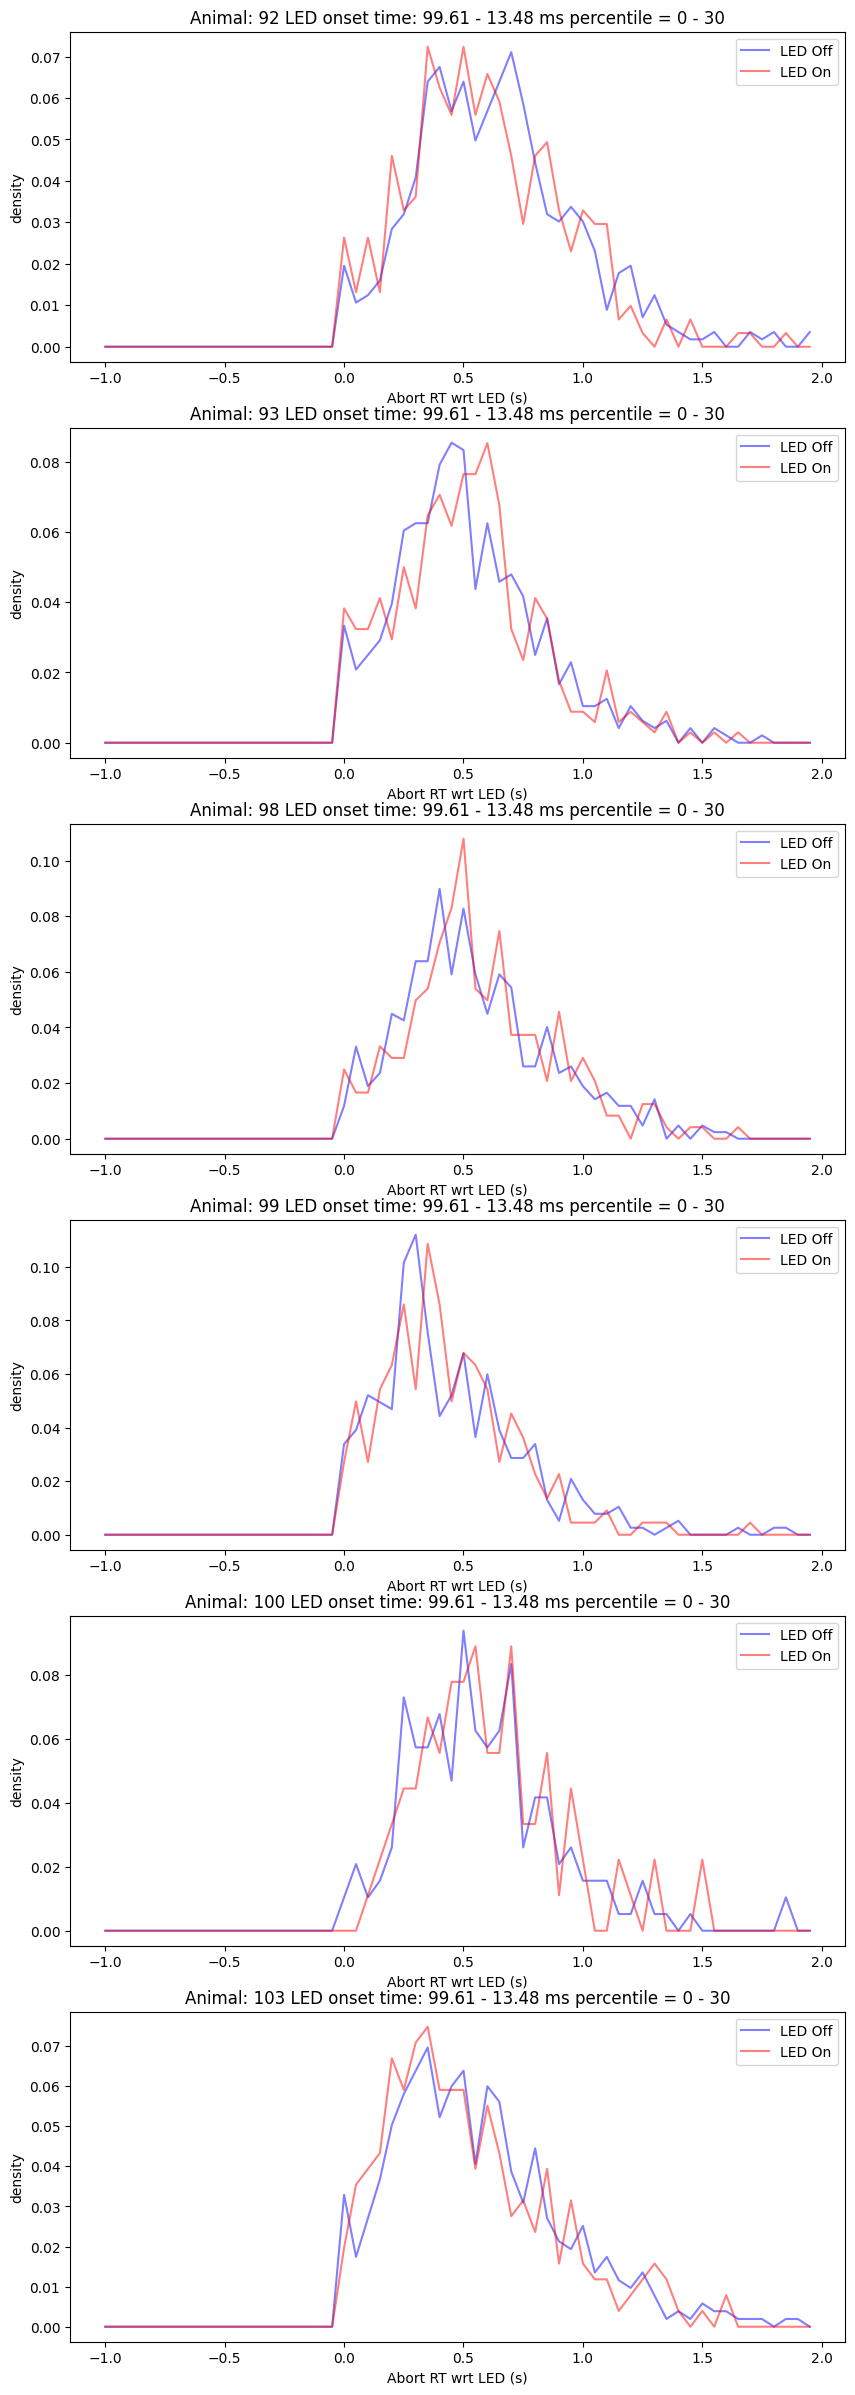

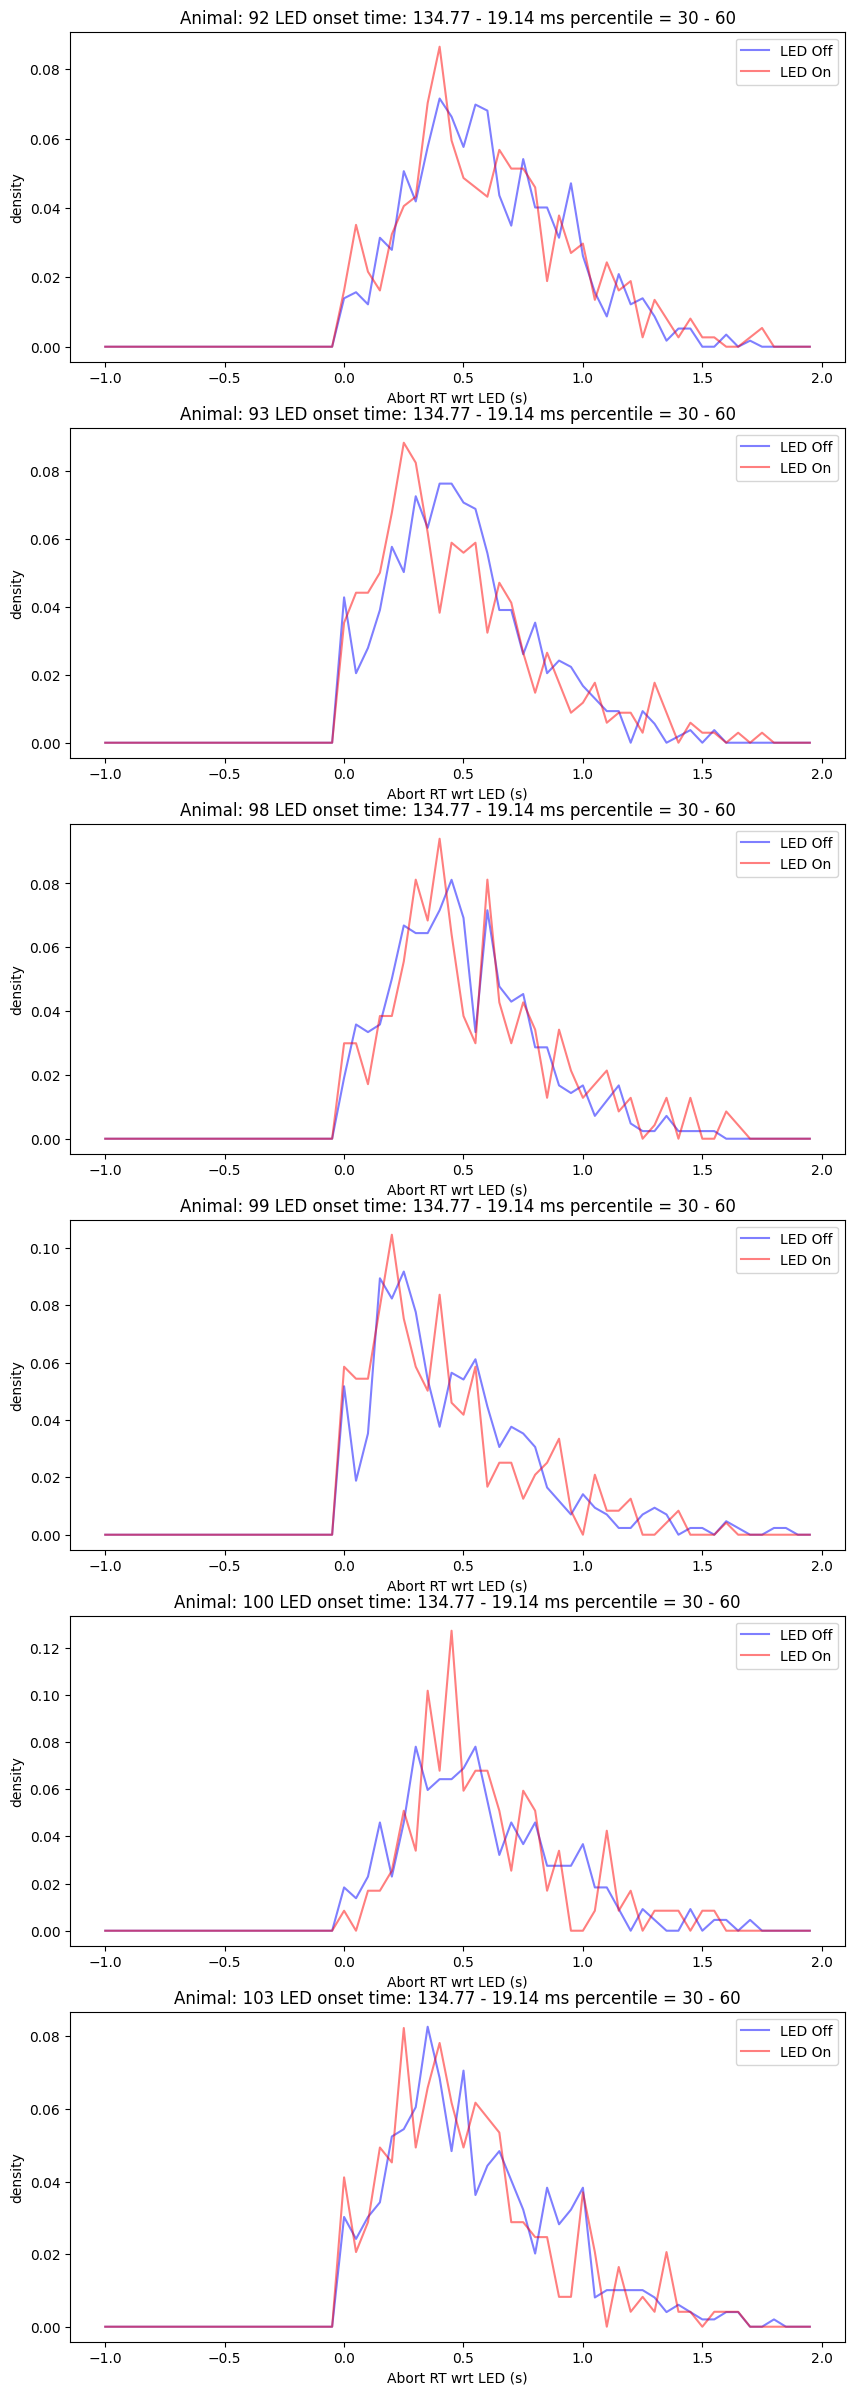

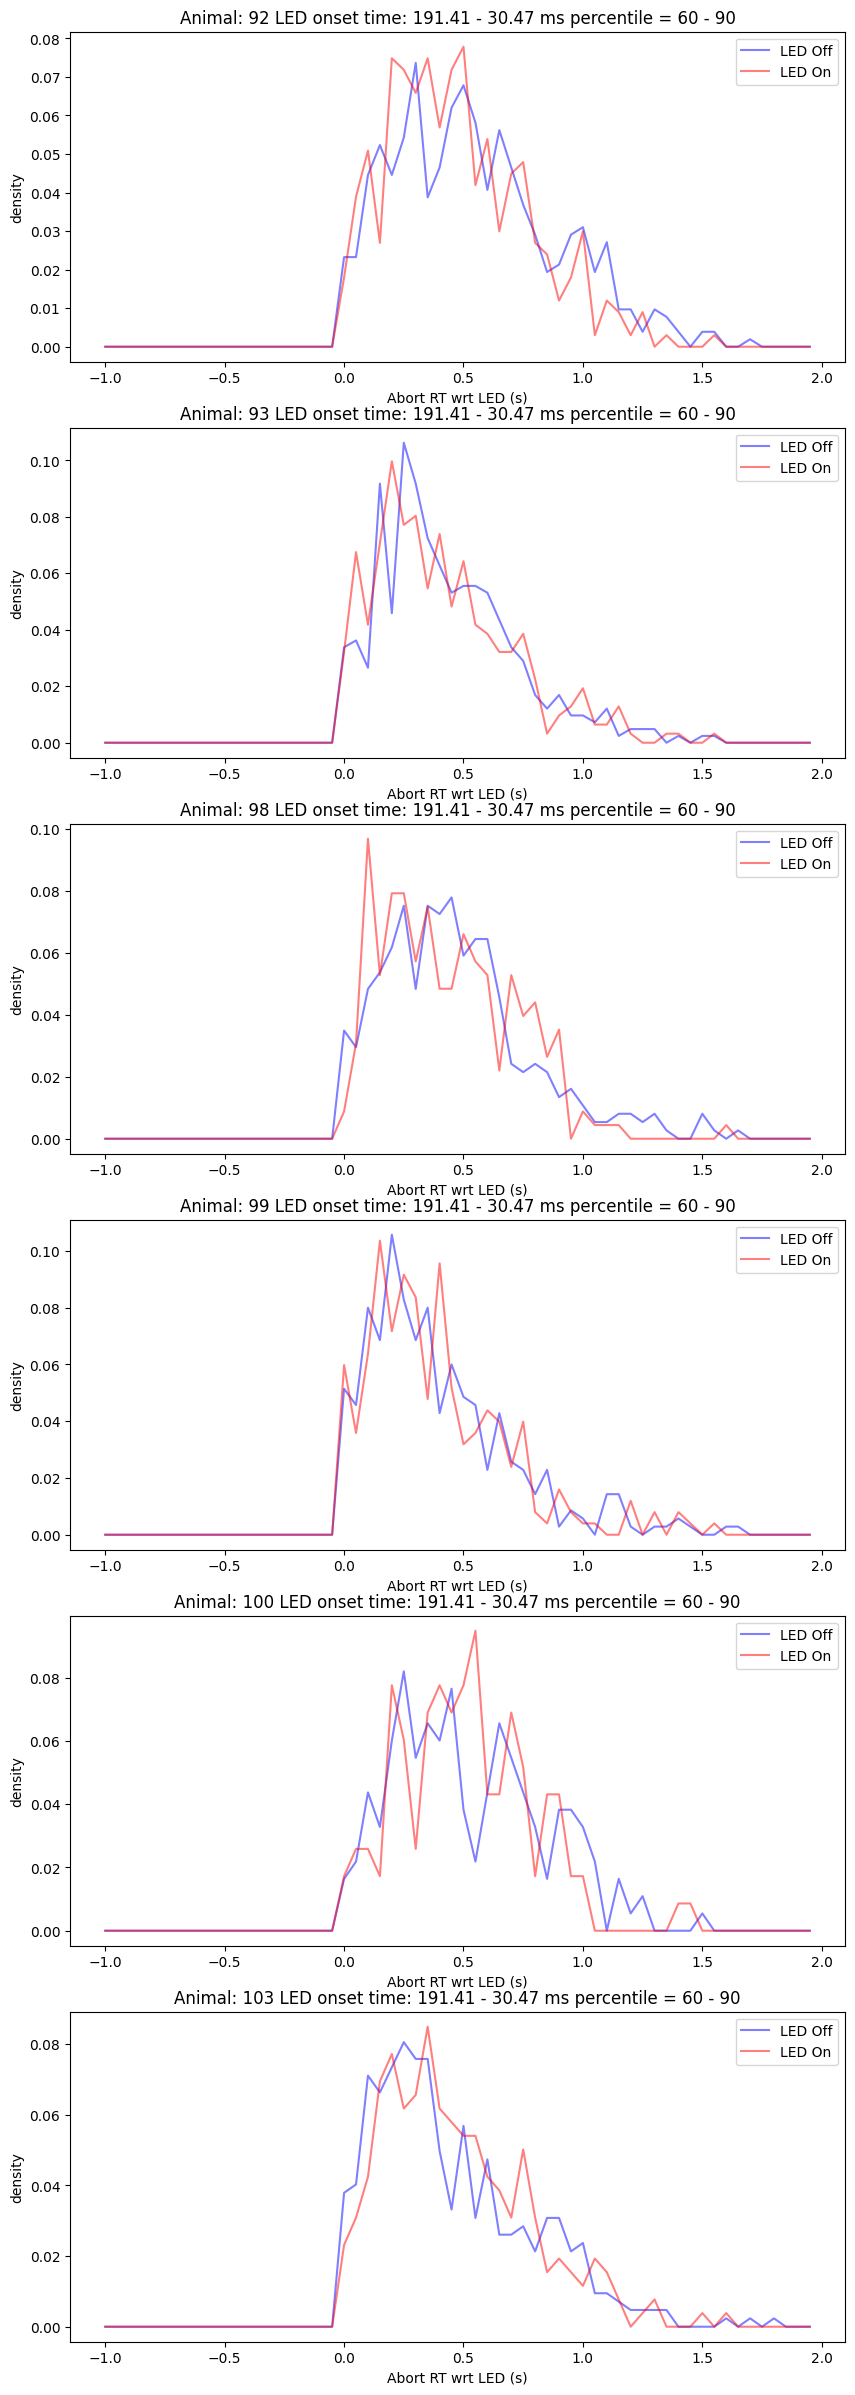

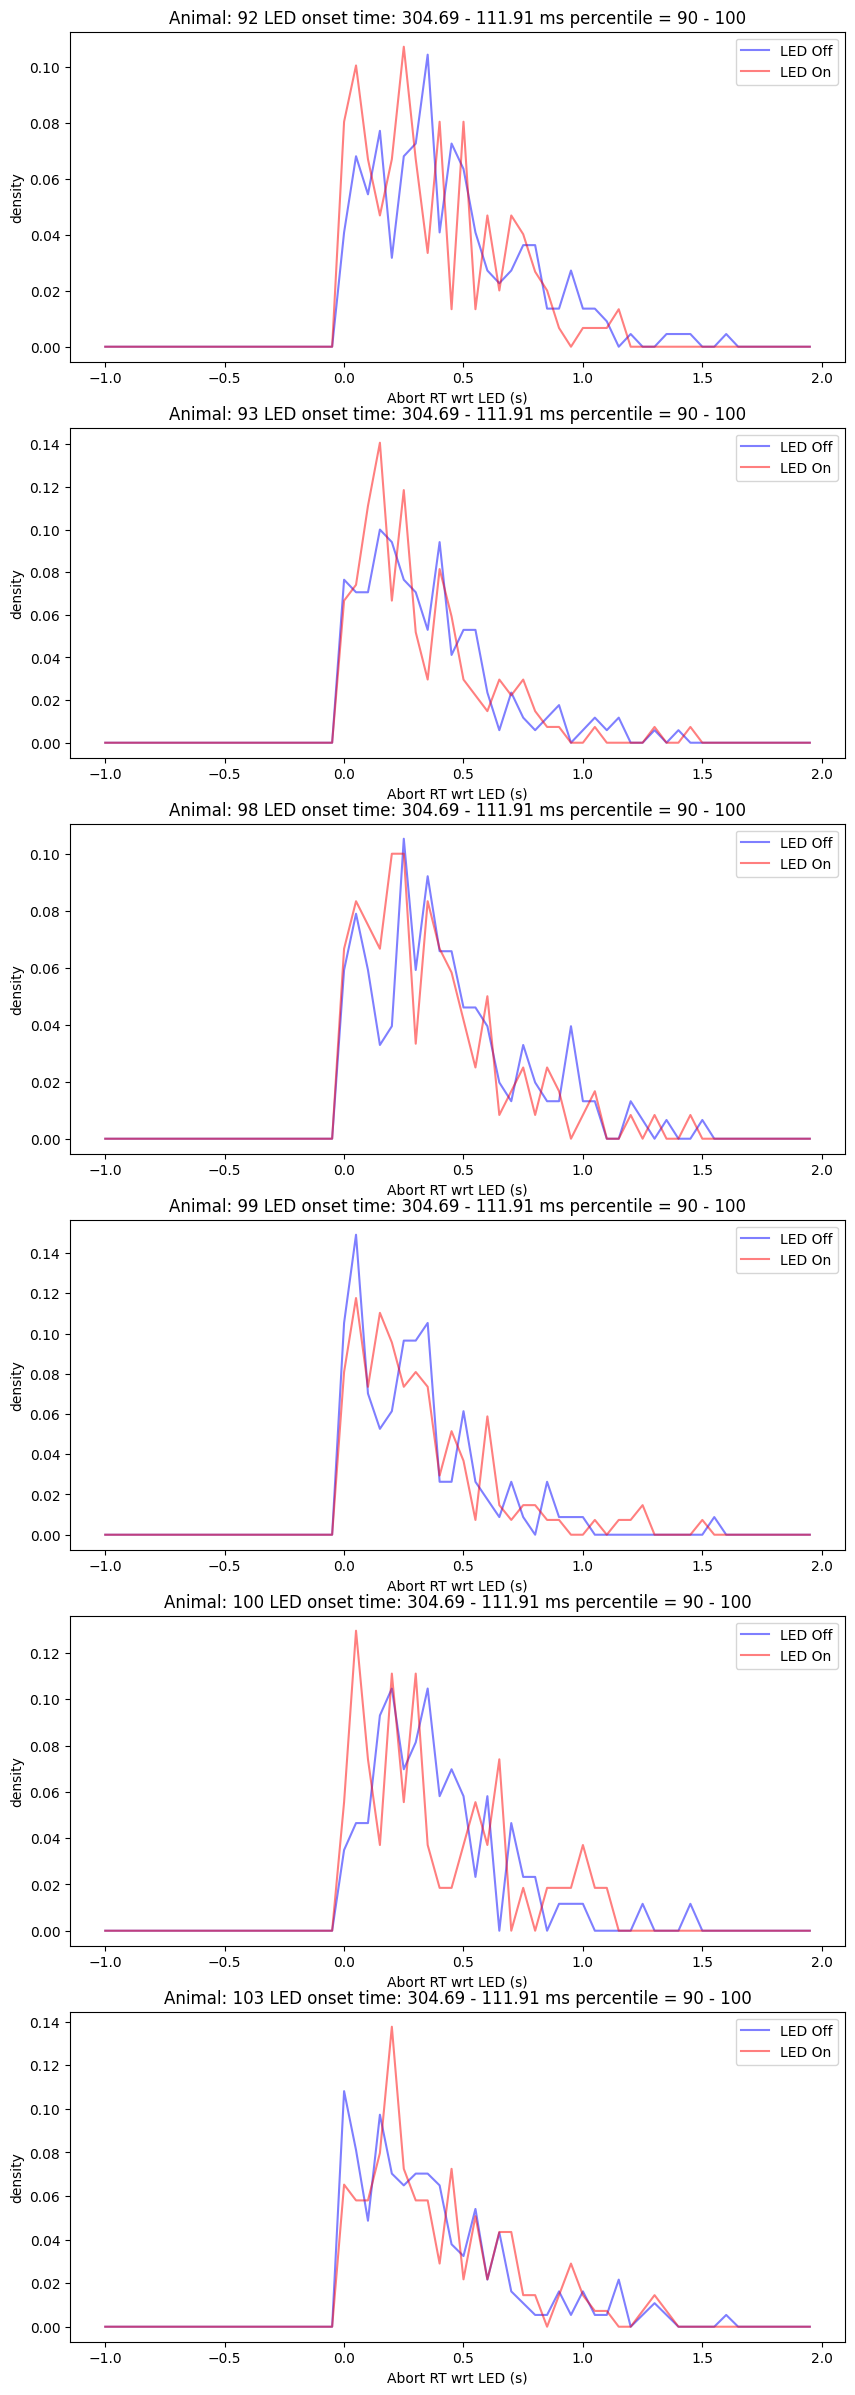

In [44]:
all_animals = df['animal'].unique()

bin_width = 0.05
t_min = -1; t_max = 2; 
bins = np.arange(t_min, t_max, bin_width)

for idx in range(0, len(percentile_tuples)):
    min_led_time = np.percentile(all_led_onset_time, percentile_tuples[idx][0])
    max_led_time = np.percentile(all_led_onset_time, percentile_tuples[idx][1])
    
    
    f = 1

    plt.figure(figsize=(10, 30))
    for animal in all_animals:
        df_animal = df[ df['animal'] == animal ]

        # OFF
        df_animal_led_0_aborts = df_animal[ (df_animal['LED_trial'] == 0) & (df_animal['abort_event'] == 3) & (df_animal['timed_fix'] > df_animal['LED_onset_time'] ) ]
        abort_counts = np.zeros_like(bins)

        N_aborts = 0
        for _, row in df_animal_led_0_aborts.iterrows():
            if row['LED_onset_time'] > min_led_time and row['LED_onset_time'] < max_led_time and not pd.isna(row['timed_fix']):
                N_aborts += 1
                abort_wrt_led = row['timed_fix'] - row['LED_onset_time']
                bin_abort_wrt_led = int((abort_wrt_led - t_min) / bin_width)
                abort_counts[bin_abort_wrt_led] += 1


        if N_aborts == 0:
            print(f'For animal {animal} no aborts found for LED off in percentile category {idx+1}')

        abort_hist_off = abort_counts / N_aborts

        # ON
        # consider aborts ONLY after LED onset
        df_animal_led_1_aborts = df_animal[ (df_animal['LED_trial'] == 1) & (df_animal['abort_event'] == 3) & (df_animal['timed_fix'] > df_animal['LED_onset_time'] ) ]
        abort_counts = np.zeros_like(bins)

        N_aborts = 0
        for _, row in df_animal_led_1_aborts.iterrows():
            if row['LED_onset_time'] > min_led_time and row['LED_onset_time'] < max_led_time and not pd.isna(row['timed_fix']):
                N_aborts += 1
                abort_wrt_led = row['timed_fix'] - row['LED_onset_time']
                bin_abort_wrt_led = int((abort_wrt_led - t_min) / bin_width)
                abort_counts[bin_abort_wrt_led] += 1

        if N_aborts == 0:
            print(f'For animal {animal} no aborts found for LED ON in percentile category {idx+1}')

        abort_hist_on = abort_counts / N_aborts

        plt.subplot(len(all_animals),1, f)
        plt.plot(bins, abort_hist_off, label='LED Off', color='b', alpha=0.5)
        plt.plot(bins, abort_hist_on, label='LED On', color='r', alpha=0.5)
        plt.xlabel('Abort RT wrt LED (s)');
        plt.ylabel('density');
        plt.title(f'Animal: {animal} LED onset time: {(min_led_time)*1000:.2f} - {(max_led_time)*100:.2f} ms percentile = {percentile_tuples[idx][0]} - {percentile_tuples[idx][1]}')
        plt.legend()

        f += 1

        # print(f'Complete percentile categroy {idx} for animal {animal}')




        

        

# same as above for all animals

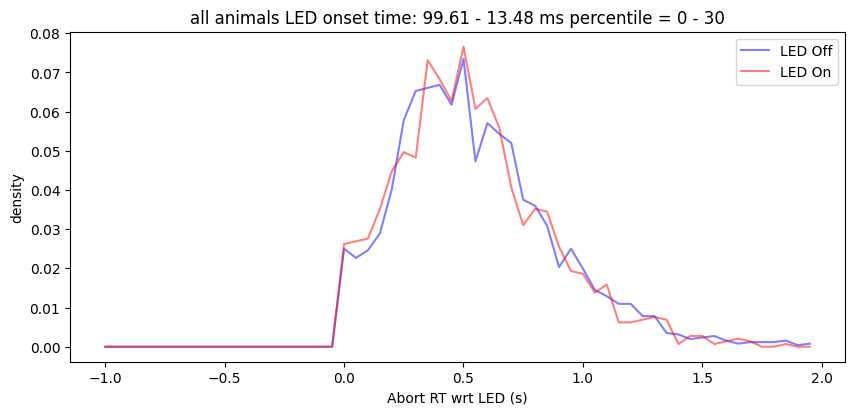

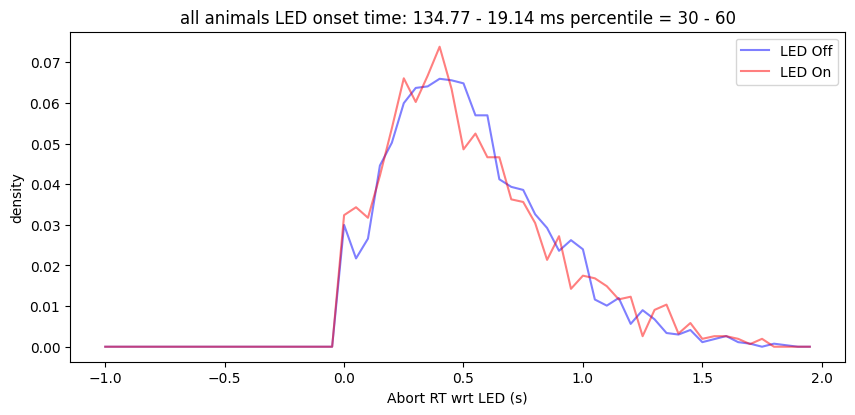

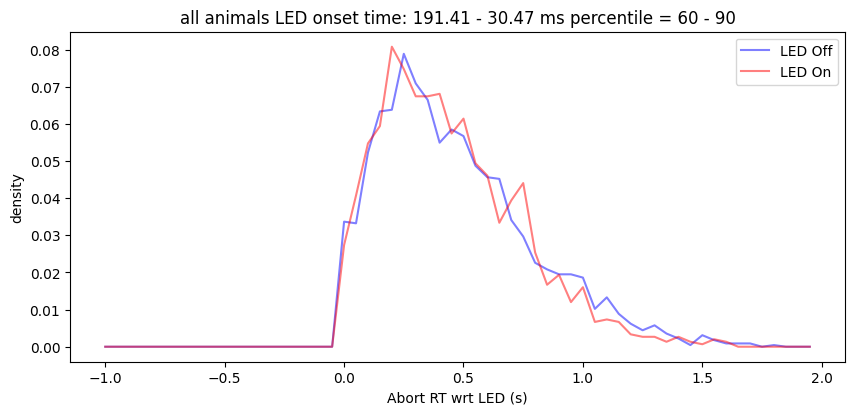

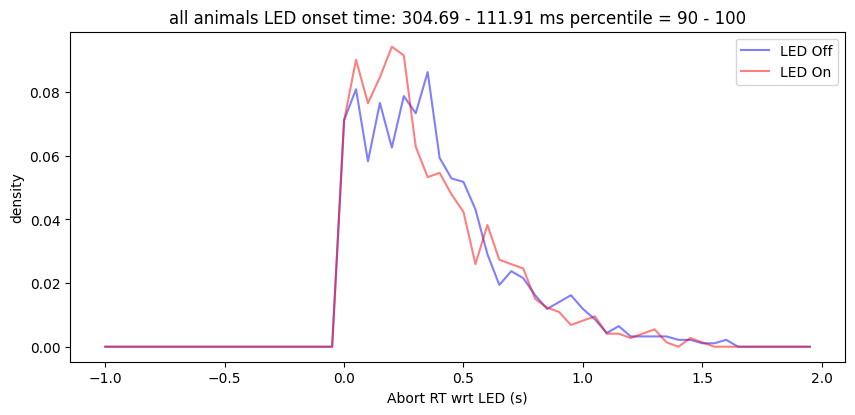

In [46]:
all_animals = df['animal'].unique()

bin_width = 0.05
t_min = -1; t_max = 2; 
bins = np.arange(t_min, t_max, bin_width)

for idx in range(0, len(percentile_tuples)):
    min_led_time = np.percentile(all_led_onset_time, percentile_tuples[idx][0])
    max_led_time = np.percentile(all_led_onset_time, percentile_tuples[idx][1])
    
    
    f = 1

    plt.figure(figsize=(10, 30))
    df_animal = df.copy()

    # OFF
    df_animal_led_0_aborts = df_animal[ (df_animal['LED_trial'] == 0) & (df_animal['abort_event'] == 3) & (df_animal['timed_fix'] > df_animal['LED_onset_time'] ) ]
    abort_counts = np.zeros_like(bins)

    N_aborts = 0
    for _, row in df_animal_led_0_aborts.iterrows():
        if row['LED_onset_time'] > min_led_time and row['LED_onset_time'] < max_led_time and not pd.isna(row['timed_fix']):
            N_aborts += 1
            abort_wrt_led = row['timed_fix'] - row['LED_onset_time']
            bin_abort_wrt_led = int((abort_wrt_led - t_min) / bin_width)
            abort_counts[bin_abort_wrt_led] += 1


    if N_aborts == 0:
        print(f'For animal {animal} no aborts found for LED off in percentile category {idx+1}')

    abort_hist_off = abort_counts / N_aborts

    # ON
    # consider aborts ONLY after LED onset
    df_animal_led_1_aborts = df_animal[ (df_animal['LED_trial'] == 1) & (df_animal['abort_event'] == 3) & (df_animal['timed_fix'] > df_animal['LED_onset_time'] ) ]
    abort_counts = np.zeros_like(bins)

    N_aborts = 0
    for _, row in df_animal_led_1_aborts.iterrows():
        if row['LED_onset_time'] > min_led_time and row['LED_onset_time'] < max_led_time and not pd.isna(row['timed_fix']):
            N_aborts += 1
            abort_wrt_led = row['timed_fix'] - row['LED_onset_time']
            bin_abort_wrt_led = int((abort_wrt_led - t_min) / bin_width)
            abort_counts[bin_abort_wrt_led] += 1

    if N_aborts == 0:
        print(f'For animal {animal} no aborts found for LED ON in percentile category {idx+1}')

    abort_hist_on = abort_counts / N_aborts

    plt.subplot(len(all_animals),1, f)
    plt.plot(bins, abort_hist_off, label='LED Off', color='b', alpha=0.5)
    plt.plot(bins, abort_hist_on, label='LED On', color='r', alpha=0.5)
    plt.xlabel('Abort RT wrt LED (s)');
    plt.ylabel('density');
    plt.title(f'all animals LED onset time: {(min_led_time)*1000:.2f} - {(max_led_time)*100:.2f} ms percentile = {percentile_tuples[idx][0]} - {percentile_tuples[idx][1]}')
    plt.legend()

    f += 1

    # print(f'Complete percentile categroy {idx} for animal {animal}')




        

        

# LED on distr

In [3]:
led_onset_time = df['LED_onset_time'].values

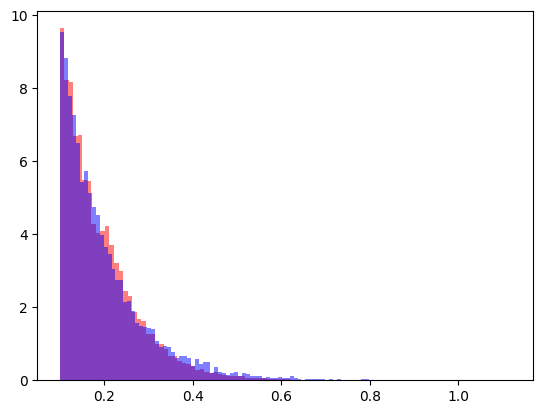

In [15]:
plt.hist(led_onset_time, bins=100, density=True, alpha=0.5, color='r', label='LED Onset Time');
# plt.axvline(x=0.1)
sample_hist = [np.random.exponential(0.1) + 0.1  for _ in range(10000)]
plt.hist(sample_hist, bins=100, density=True, alpha=0.5, color='b', label='Exponential distribution');

In [6]:
min(led_onset_time)

np.float64(0.099609375)

In [ ]:
pl